In [2]:
import numpy as np
import timeit
import sys
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from copy import deepcopy as copy
from typing import List, Tuple

# MCTS code imports
sys.path.append("..")  # Adds higher directory to python modules path.
from state_evaluation.reinforcement_learning import MCTSRLWrapper, plot_state_image, get_image_based_state
from main import MeasurementControlEnvironment
from mcts.mcts import mcts_search, get_best_action_trajectory
from mcts.tree_viz import render_pyvis
from utils import rotate_about_point
from exploration_grid import ExplorationGrid

### Create Game Environment and RL Wrapper (This initializes NN at random)

In [5]:
# Create the environment and RL wrapper (This initiailizes a new random nerual network)
env = MeasurementControlEnvironment()
rl = MCTSRLWrapper(env, 'new', env.N, width_pixels=30, width_meters=50)

Toy Measurement Control Initialized
Using device: cuda
Model loaded


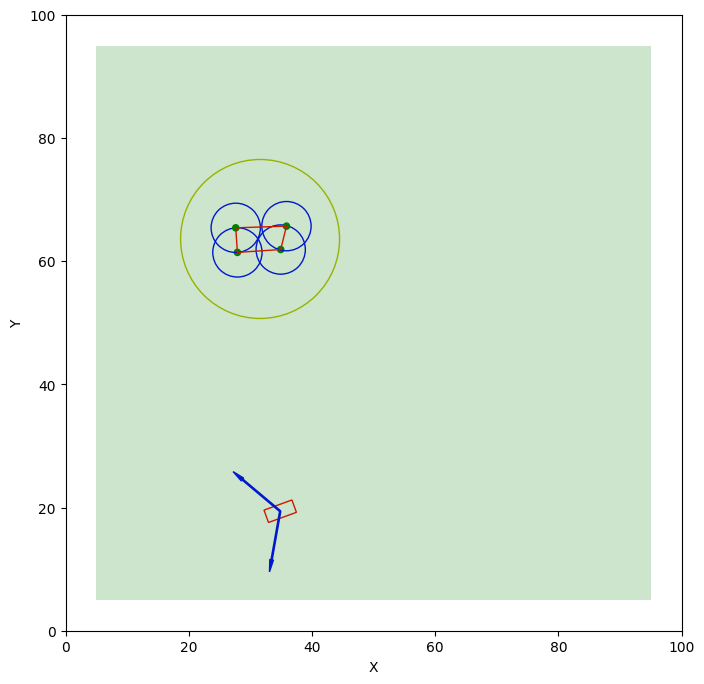

In [6]:
# Generate a random starting state and draw the grid and state
starting_state = env.reset()
env.draw_state(starting_state, explore_grid=True)

start time environment: 0.0009  
start time image state: 0.009

Time for environment step: 0.0004759250005008653
Time for image state generation: 0.009839136000664439
Time for environment step: 0.00044960499872104265
Time for image state generation: 0.009629738000512589
Time for environment step: 0.000448065999080427
Time for image state generation: 0.009816696001507808
Time for environment step: 0.0005053249988122843
Time for image state generation: 0.009975644999940414
Time for environment step: 0.0019416399991314393
Time for image state generation: 0.009858884997811401


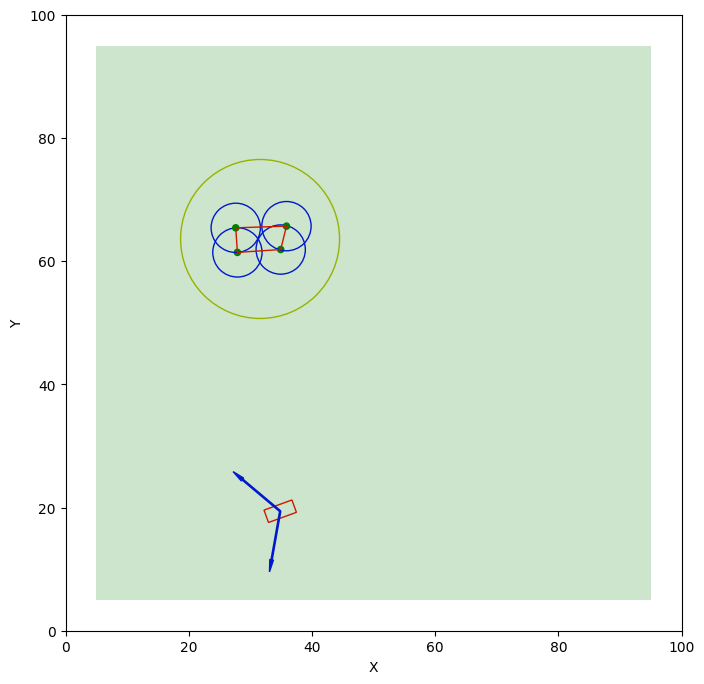

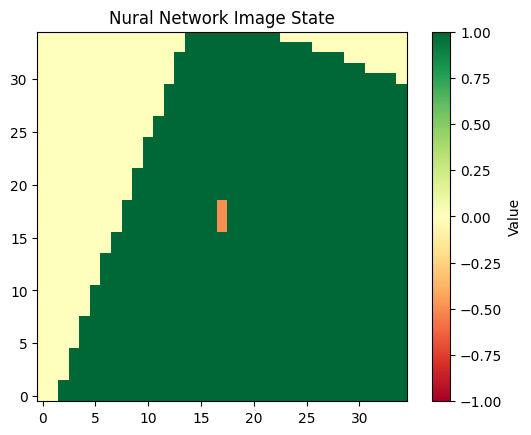

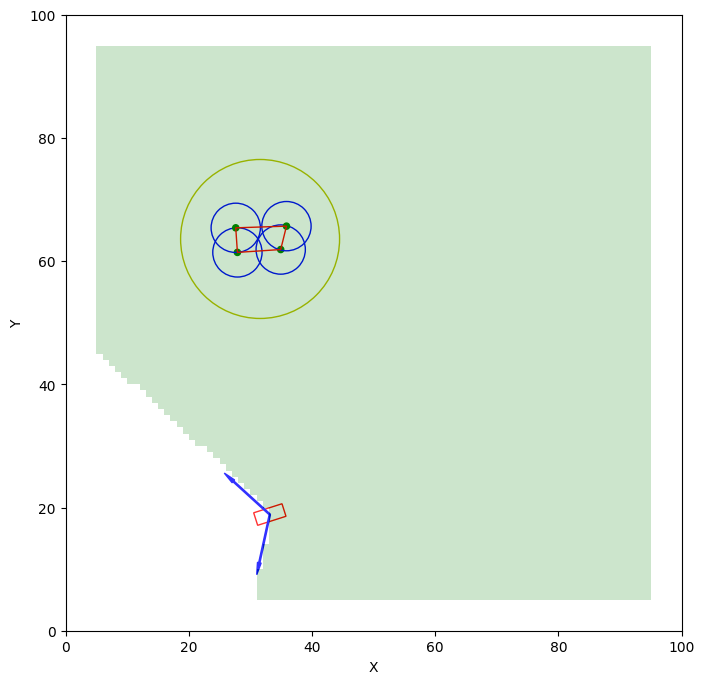

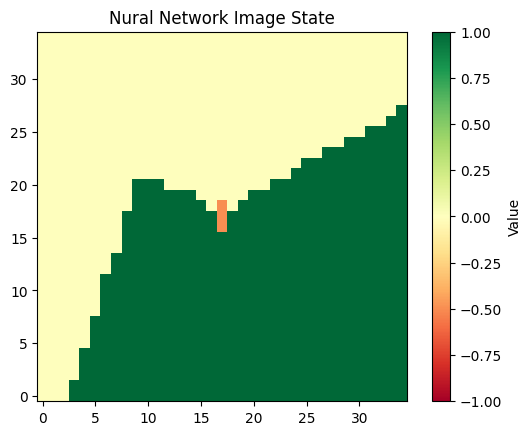

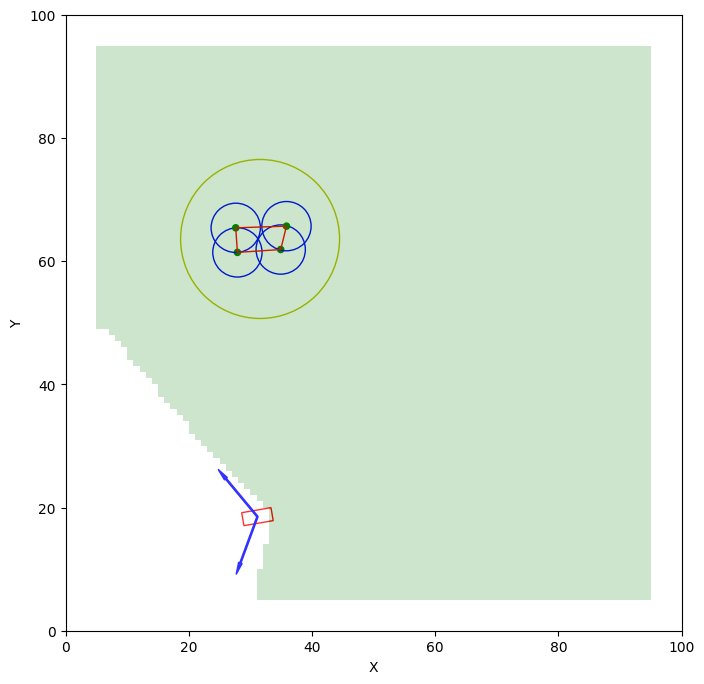

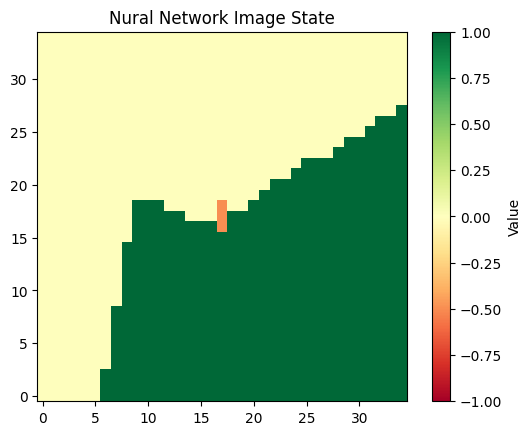

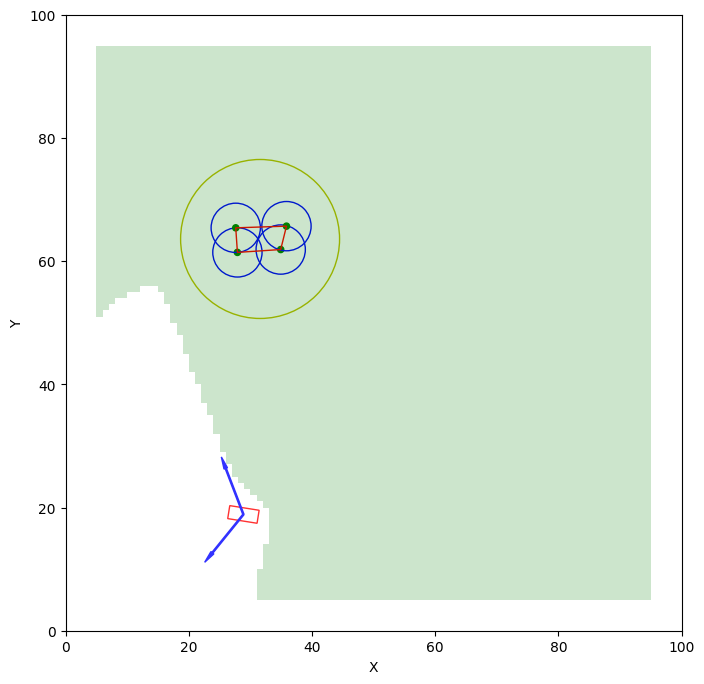

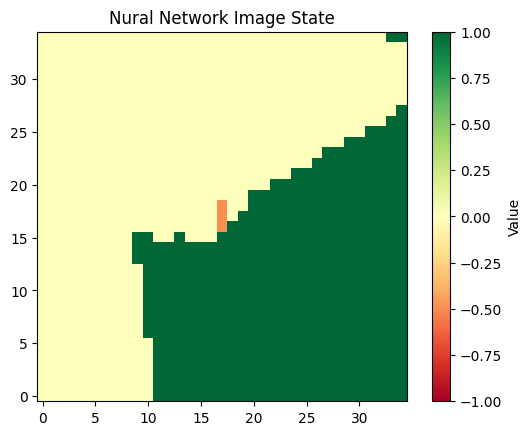

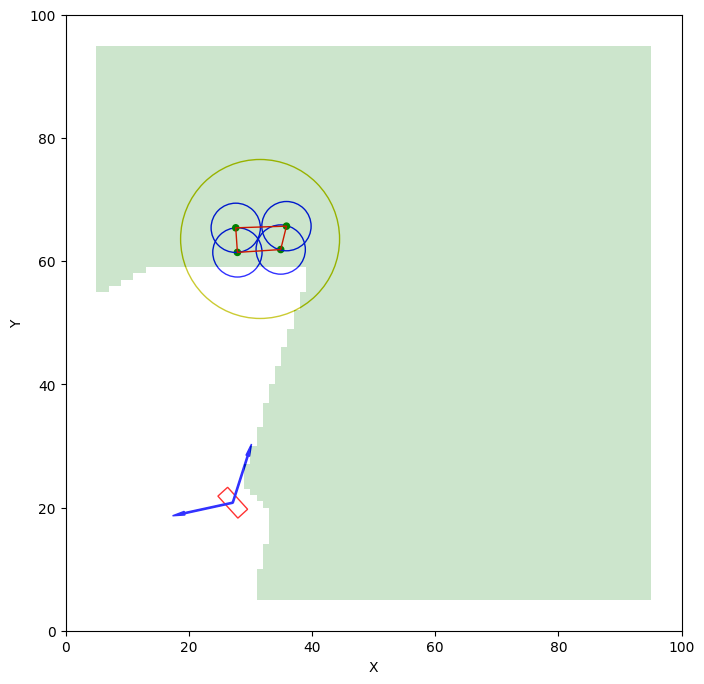

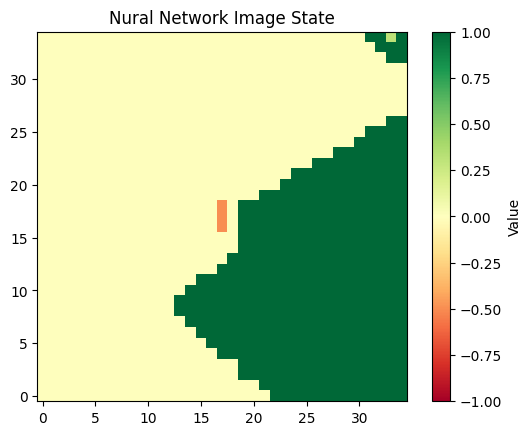

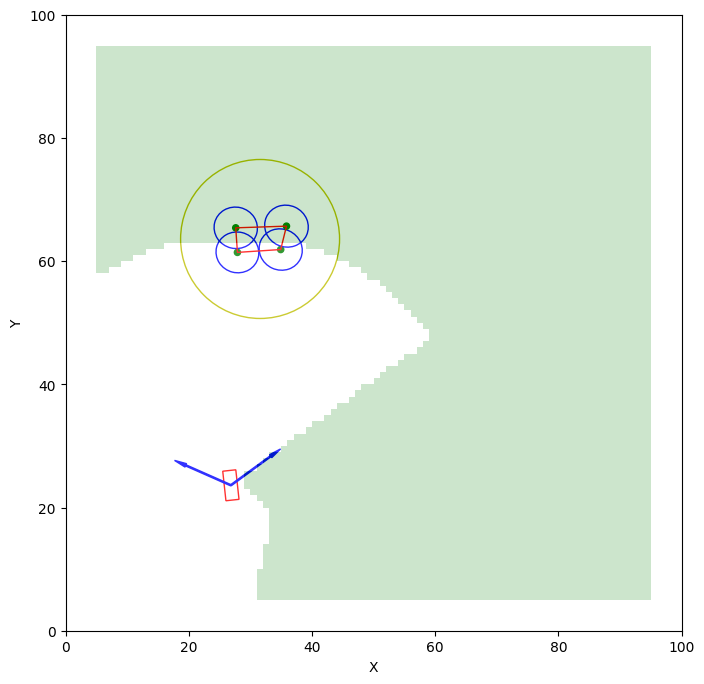

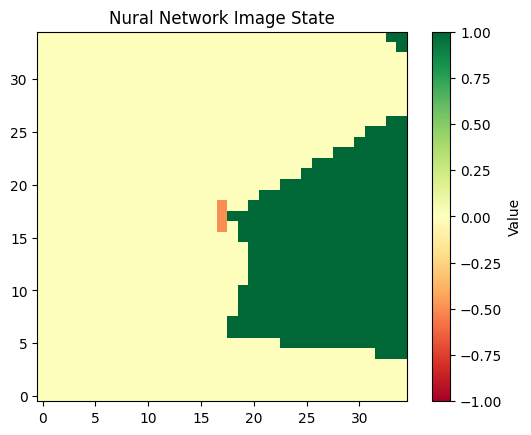

In [7]:
state = starting_state
state[0][2] = 5. # Set starting velocity if wanted

env.draw_state(state, explore_grid=True)
nn_car_state, nn_image_state = get_image_based_state(env, state, width_pixels=35, 
        width_meters=60, explore_grid=env.explore_grid.grid, grid_origin=env.explore_grid.grid_origin, meters_per_pixel=env.explore_grid.meters_per_pixel)
plot_state_image(nn_image_state, 'Nural Network Image State')

for _ in range(5):
    start_time = timeit.default_timer()
    state, reward, done = env.step(state, [1., -1.])
    print("Time for environment step:", timeit.default_timer() - start_time)
    env.draw_state(state, explore_grid=True)
    start_time = timeit.default_timer()
    nn_car_state, nn_image_state = get_image_based_state(env, state, width_pixels=35, 
        width_meters=60, explore_grid=env.explore_grid.grid, grid_origin=env.explore_grid.grid_origin, meters_per_pixel=env.explore_grid.meters_per_pixel)
    print("Time for image state generation:", timeit.default_timer() - start_time)
    plot_state_image(nn_image_state, 'Nural Network Image State')